## Use tutor bios to engineer features with keywords extraction

In [1]:
#import/download necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import re
import nltk

from nltk.corpus import stopwords
#nltk.download('stopwords')
st = set(stopwords.words('english'))

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
# read in data
df_eng = pd.read_csv('/Users/NewUser/Documents/GitHub/tutor_prediction/tutor_prediction/data/tutor_data.csv').drop(columns='Unnamed: 0')
#df_eng.drop_duplicates(inplace=True)

df_eng.reset_index(drop=True, inplace=True)
df_eng['bio_count'] = df_eng['bio'].apply(lambda x: len(str(x).split(" ")))

In [5]:
freq = pd.Series(' '.join(df_eng['bio']).split()).value_counts()[:20]
freq

and         46159
I           43537
to          32392
the         28163
a           26517
in          25873
of          19786
have        14921
my          12585
for         12279
with        12221
students    11009
as           9223
that         7928
is           7910
am           7156
math         6325
at           6292
you          6169
tutoring     5797
dtype: int64

In [3]:
%%time
#Create the corpus of bios

stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "one", "two", "new", "previously", "shown", 'math']
stop_words = stop_words.union(new_words)

corpus = []
for i in range(0, len(df_eng['bio'])):
    
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df_eng['bio'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # remove periods
    text = text.replace('.', '').replace(',' , '')
    
    #Convert to list from string
    text = text.split()
    
    ##Stemming
    stemmer=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    #text = [stemmer.stem(lem.lemmatize(word)) for word in text if not word in stop_words]
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = " ".join(text)
    corpus.append(text)

CPU times: user 9.45 s, sys: 191 ms, total: 9.64 s
Wall time: 9.69 s


[Text(0, 0, 'student'),
 Text(0, 0, 'school'),
 Text(0, 0, 'tutoring'),
 Text(0, 0, 'year'),
 Text(0, 0, 'teaching'),
 Text(0, 0, 'help'),
 Text(0, 0, 'college'),
 Text(0, 0, 'high'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'tutor'),
 Text(0, 0, 'science'),
 Text(0, 0, 'subject'),
 Text(0, 0, 'algebra'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'university'),
 Text(0, 0, 'mathematics'),
 Text(0, 0, 'level'),
 Text(0, 0, 'work'),
 Text(0, 0, 'calculus'),
 Text(0, 0, 'time')]

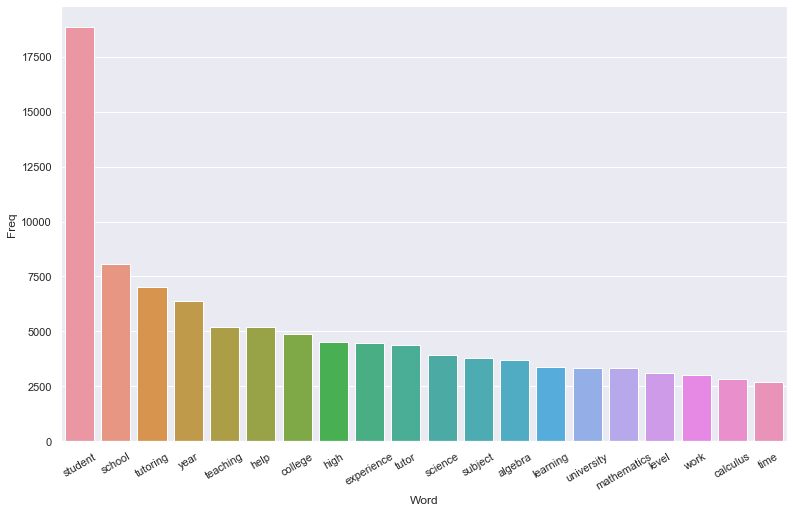

In [4]:
#Most frequently occuring words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'high school'),
 Text(0, 0, 'help student'),
 Text(0, 0, 'middle school'),
 Text(0, 0, 'year experience'),
 Text(0, 0, 'helping student'),
 Text(0, 0, 'look forward'),
 Text(0, 0, 'school student'),
 Text(0, 0, 'school college'),
 Text(0, 0, 'sat act'),
 Text(0, 0, 'experience tutoring'),
 Text(0, 0, 'algebra geometry'),
 Text(0, 0, 'college level'),
 Text(0, 0, 'algebra algebra'),
 Text(0, 0, 'master degree'),
 Text(0, 0, 'tutoring experience'),
 Text(0, 0, 'computer science'),
 Text(0, 0, 'working student'),
 Text(0, 0, 'college student'),
 Text(0, 0, 'feel free'),
 Text(0, 0, 'pre algebra')]

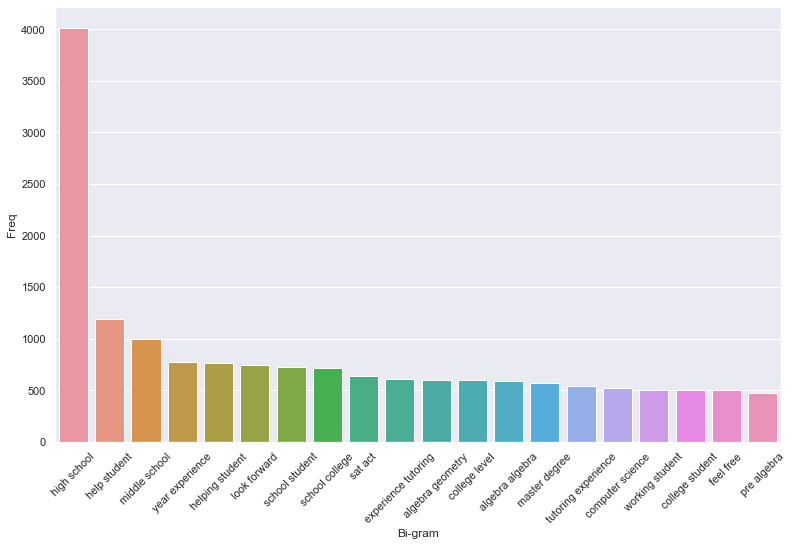

In [5]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

[Text(0, 0, 'high school college'),
 Text(0, 0, 'high school student'),
 Text(0, 0, 'feel free contact'),
 Text(0, 0, 'school high school'),
 Text(0, 0, 'pre algebra algebra'),
 Text(0, 0, 'middle school high'),
 Text(0, 0, 'middle high school'),
 Text(0, 0, 'please feel free'),
 Text(0, 0, 'high school level'),
 Text(0, 0, 'year experience tutoring'),
 Text(0, 0, 'look forward working'),
 Text(0, 0, 'look forward hearing'),
 Text(0, 0, 'algebra algebra geometry'),
 Text(0, 0, 'year experience teaching'),
 Text(0, 0, 'school college level'),
 Text(0, 0, 'year tutoring experience'),
 Text(0, 0, 'algebra geometry trigonometry'),
 Text(0, 0, 'school college student'),
 Text(0, 0, 'pre calculus calculus'),
 Text(0, 0, 'high school teacher')]

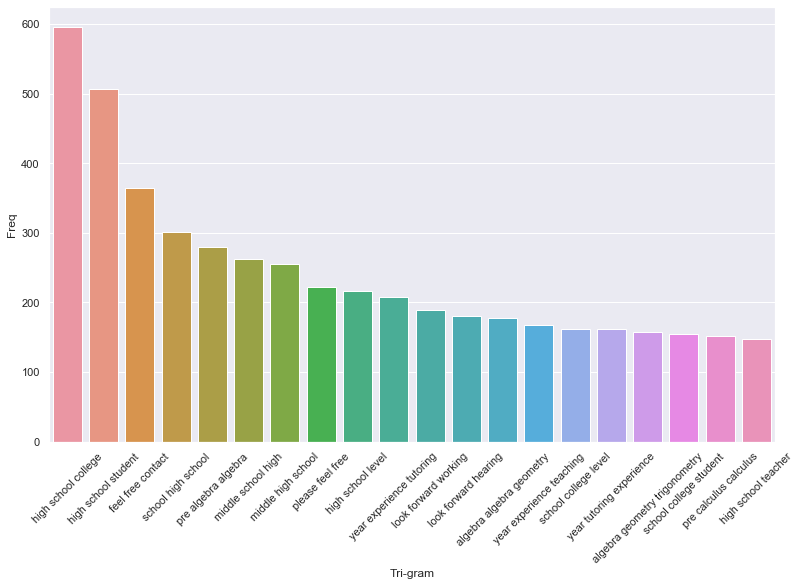

In [6]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

### Use tf-idf to find relevant 1, 2, 3 grams containing information besides subject, education, etc. 

In [7]:
%%time
df_nlp = pd.DataFrame()
for i in range(4):
    vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=200)
    vectors = vectorizer.fit(corpus)
    vectors = vectors.transform(corpus)
    
    names = vectorizer.get_feature_names()
    data = vectors.todense().tolist()
    # Create a dataframe with the results
    temp_df = pd.DataFrame(data, columns=names)
    df_nlp = pd.concat([df_nlp, temp_df], axis=1)

CPU times: user 15.5 s, sys: 631 ms, total: 16.1 s
Wall time: 16.4 s


In [8]:
list(df_nlp.columns)

['able help',
 'achieve goal',
 'act sat',
 'algebra algebra',
 'algebra calculus',
 'algebra geometry',
 'algebra ii',
 'algebra pre',
 'algebra trigonometry',
 'ap calculus',
 'ap physic',
 'ask question',
 'bachelor degree',
 'bachelor science',
 'biology chemistry',
 'calculus ab',
 'calculus calculus',
 'calculus differential',
 'calculus ii',
 'certified teacher',
 'chemistry biology',
 'chemistry physic',
 'college algebra',
 'college level',
 'college student',
 'common core',
 'community college',
 'computer science',
 'contact question',
 'cum laude',
 'currently working',
 'degree mathematics',
 'different way',
 'differential equation',
 'electrical engineering',
 'elementary middle',
 'elementary school',
 'enjoy helping',
 'enjoy teaching',
 'enjoy tutoring',
 'enjoy working',
 'every student',
 'experience teaching',
 'experience tutoring',
 'experience working',
 'extensive experience',
 'favorite subject',
 'feel free',
 'five year',
 'forward hearing',
 'forward helpi

### Here we manually categorize keywords into 4 relevant groups: experience, welcoming, goal, and passion

In [9]:
experience_list = ['experience teaching tutoring', 'experience tutoring student', 'experience working student', 
                   'many student', 'many year', 
                   'year experience teaching', 'year experience tutoring',
                   'year experience working',
                   'year teaching experience', 'year tutoring experience']
                   
welcoming_list = ['look forward hearing', 'look forward helping', 'look forward meeting', 'look forward working',
                  'forward working', 'hello name', 'hi name', 'please contact', 'please feel',
                  'would like', 'would love', 'feel free contact', 'feel free reach', 'free contact question']
                  
goal_list = ['goal help student', 'achieve academic goal',  
             'help student succeed', 'helping student achieve']

passion_list = ['enjoy helping student', 'enjoy working student', 'look forward', 
                 'believe every student', 'love help', 'love teaching', 
                 'love helping student', 'love working student', 'would love help']

#### Create binary features for each category if a bio contains any of its keywords

In [10]:
experience_array = []
welcoming_array = []
goal_array = []
passion_array = []

# loop through corpus to generate features
for b in corpus:
    experience_count = 0
    welcoming_count = 0
    goal_count = 0
    passion_count = 0
    if any(x in b for x in experience_list):
        experience_count += 1
    if any(x in b for x in welcoming_list):
        welcoming_count += 1
    if any(x in b for x in goal_list):
        goal_count += 1
    if any(x in b for x in passion_list):
        passion_count += 1
    experience_array.append(experience_count)
    welcoming_array.append(welcoming_count)
    goal_array.append(goal_count)
    passion_array.append(passion_count)
    
# add features to df_eng
df_eng['experience_kw'] = np.array(experience_array)
df_eng['welcoming_kw'] = np.array(welcoming_array)
df_eng['goal_kw'] = np.array(goal_array)
df_eng['passion_kw'] = np.array(passion_array)

In [11]:
# see scores for keyword features in the highest demand tutors

top_tutors = [np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['experience_kw'].head(100)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['welcoming_kw'].head(100)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['goal_kw'].head(100)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['passion_kw'].head(100)).mean(),
                np.array(df_eng.sort_values('hours_per_week_estimate', ascending=False)['bio_count'].head(100)).mean()] 
top_tutors

[0.22, 0.27, 0.02, 0.28, 257.85]

In [12]:
# output nlp-engineered features to csv file

df_nlp_category = df_eng[['experience_kw','welcoming_kw', 'goal_kw', 'passion_kw']]
df_nlp_category.to_csv('/Users/NewUser/Documents/GitHub/tutor_prediction/tutor_prediction/data/tutor_nlp.csv', index=False)
df_nlp_category.describe()

,experience_kw,welcoming_kw,goal_kw,passion_kw
count,4484.000000,4484.000000,4484.000000,4484.000000
mean,0.264273,0.368421,0.045495,0.297948
std,0.440994,0.482430,0.208411,0.457408
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000
